In [37]:
! pip install geopandas
! pip install pulp
! pip install spopt
! pip install glpk
! pip install coinor-cbc
! pip install matplotlib-scalebar

  Using cached glpk-0.4.7.tar.gz (161 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build glpk


  error: subprocess-exited-with-error
  
  × Building wheel for glpk (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [11 lines of output]
      WARNING setuptools_scm.pyproject_reading toml section missing 'pyproject.toml does not contain a tool.setuptools_scm section'
      Traceback (most recent call last):
        File "C:\Users\ASUS\AppData\Local\Temp\pip-build-env-759c31_y\overlay\Lib\site-packages\setuptools_scm\_integration\pyproject_reading.py", line 36, in read_pyproject
          section = defn.get("tool", {})[tool_name]
                    ~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^
      KeyError: 'setuptools_scm'
      running bdist_wheel
      running build
      running build_ext
      building 'glpk' extension
      error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a p

In [38]:
%config InlineBackend.figure_format = "retina"
%load_ext watermark
%watermark

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: 2024-05-30T22:53:00.501993+07:00

Python implementation: CPython
Python version       : 3.12.3
IPython version      : 8.24.0

Compiler    : MSC v.1938 64 bit (AMD64)
OS          : Windows
Release     : 11
Machine     : AMD64
Processor   : Intel64 Family 6 Model 140 Stepping 1, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [39]:
import pandas as pd
import networkx as nx
import geopandas
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.lines as mlines
import matplotlib_scalebar
from matplotlib_scalebar.scalebar import ScaleBar
from shapely.geometry import Point
import time
import numpy as np
import pulp
import shapely
import spopt
from spopt.locate import PCenter, simulated_geo_points

import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # ignore deprecation warning - GH pysal/spaghetti#649
    import spaghetti

%watermark -w
%watermark -iv

Watermark: 2.4.3

matplotlib         : 3.8.4
numpy              : 1.26.4
geopandas          : 0.14.4
pulp               : 2.8.0
pandas             : 2.2.2
networkx           : 3.3
shapely            : 2.0.4
spaghetti          : 1.7.5.post1
spopt              : 0.6.0
matplotlib_scalebar: 0.8.1



In [40]:
network_distance = pd.read_csv('C:/Users/ASUS/Downloads/Graph/DB_Result_CSV_Rescue_Station/network_distance.csv')
network_distance

,StartPoint,EndPoint,Distance,net_length
0,0,1,10.0,500.0
1,1,2,10.0,0.0
2,2,3,10.0,0.0
3,3,4,10.0,0.0
4,4,5,10.0,0.0
...,...,...,...,...
2496,49,45,40.0,0.0
2497,49,46,30.0,0.0
2498,49,47,20.0,0.0
2499,49,48,10.0,0.0


In [41]:
facility_points = pd.read_csv('C:/Users/ASUS/Downloads/Graph/DB_Result_CSV_Rescue_Station/facility_points.csv')
facility_points = facility_points.reset_index(drop=True)
facility_points

,Id,FacilityPoints,XX,YY
0,0,0,612684.883012,1.189163e+06
1,1,1,612684.883012,1.189173e+06
2,2,2,612684.883012,1.189183e+06
3,3,3,612684.883012,1.189193e+06
4,4,4,612684.883012,1.189203e+06
5,5,5,612684.883012,1.189213e+06
6,6,6,612684.883012,1.189223e+06
7,7,7,612684.883012,1.189233e+06
8,8,8,612684.883012,1.189243e+06
9,9,9,612684.883012,1.189253e+06


In [42]:
study_area = geopandas.read_file('C:/Users/ASUS/Downloads/Graph/Thuyhe_HCM_motphan_DISSOLVE_Line5/Thuyhe_HCM_motphan_DISSOLVE_Line5.shp').dissolve()
study_area

,geometry,FID_Thuyhe,Id,FromPoint,ToPoint,chieudai
0,"MULTILINESTRING ((617513.206 1190883.916, 6175...",1,0,-1,-1,14496.490398


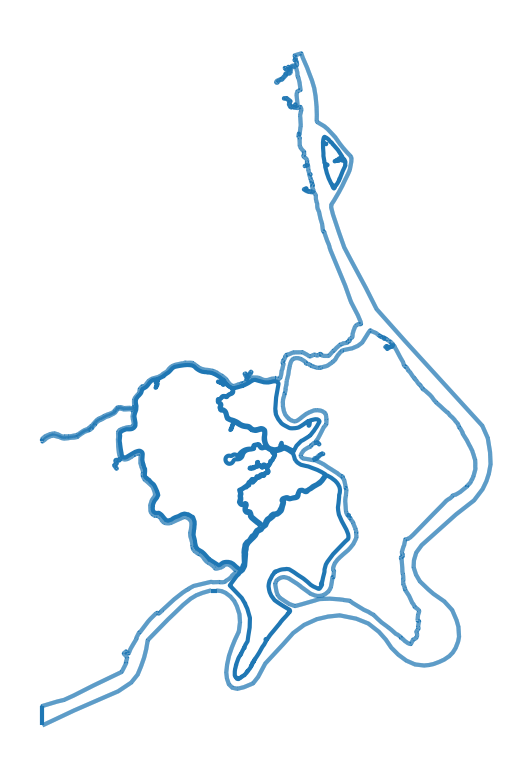

In [43]:
base = study_area.plot()
base.axis("off");
plt.show()

In [44]:
# # Tạo bảng pivot từ dataframe
# pivot_table = network_distance.pivot_table(values='Distance', index='StartPoint', columns='EndPoint')

# # Thay thế các giá trị NaN = 0
# cost_matrix = pivot_table.fillna(0).astype(int)
# # cost_matrix[cost_matrix == 0] = 1

# print(cost_matrix)

import pandas as pd

# Tạo bảng pivot từ dataframe
pivot_table = network_distance.pivot_table(values='Distance', index='EndPoint', columns='StartPoint', fill_value=0)

# Thay thế các giá trị NaN = 0 (nếu có)
cost_matrix = pivot_table.astype(int)

print(cost_matrix)



StartPoint   0    1    2    3    4    5    6    7    8    9   ...   40   41  \
EndPoint                                                      ...             
1            10    0   10   20   30   39   50   59   69   80  ...  389  399   
2            20   10    0   10   20   29   40   49   59   70  ...  379  389   
3            30   20   10    0   10   19   30   39   49   60  ...  369  379   
4            40   30   20   10    0    9   19   29   39   49  ...  359  369   
5            49   39   29   19    9    0   10   19   29   40  ...  349  359   
6            60   50   40   30   19   10    0    9   19   29  ...  339  349   
7            69   59   49   39   29   19    9    0   10   20  ...  329  339   
8            79   69   59   49   39   29   19   10    0   10  ...  319  329   
9            90   80   70   60   49   40   29   20   10    0  ...  309  319   
10           99   89   79   69   59   49   39   29   19    9  ...  299  309   
11          109   99   89   79   69   59   49   39  

In [45]:
# Nhập số lượng facilities cần tìm
p_facilities = int(input("Nhập số lượng facilities cần tìm: "))

# Số lượng điểm
num_points = cost_matrix.shape[0]

# Thiết lập bài toán quy hoạch nguyên
model = pulp.LpProblem("p-Center Problem", pulp.LpMinimize)

# Biến quyết định
x = pulp.LpVariable.dicts("x", (range(num_points), range(num_points)), 0, 1, pulp.LpBinary)
y = pulp.LpVariable.dicts("y", range(num_points), 0, 1, pulp.LpBinary)

# Hàm mục tiêu: minimize max distance
z = pulp.LpVariable("z", 0)
model += z

# Ràng buộc: mỗi điểm phải được phục vụ bởi đúng một facility
for i in range(num_points):
    model += pulp.lpSum(x[i][j] for j in range(num_points)) == 1

# Ràng buộc: số lượng facilities được chọn bằng p_facilities
model += pulp.lpSum(y[j] for j in range(num_points)) == p_facilities

# Ràng buộc: x[i][j] <= y[j] và z >= d_ij * x[i][j]
for i in range(num_points):
    for j in range(num_points):
        model += x[i][j] <= y[j]
        model += z >= cost_matrix.iloc[i, j] * x[i][j]

# Giải bài toán
model.solve()

# In kết quả
print(f"Trạng thái giải: {pulp.LpStatus[model.status]}")
print(f"Khoảng cách tối ưu: {pulp.value(z)}")
print("Các điểm được chọn làm facility:")

selected_facilities = []
for j in range(num_points):
    if pulp.value(y[j]) == 1:
        facility_info = facility_points.iloc[j]
        selected_facilities.append({
            "id": facility_info["Id"],
            "facilities": facility_info["FacilityPoints"],
            "XX": facility_info["XX"],
            "YY": facility_info["YY"]
        })

# Tạo DataFrame từ danh sách các điểm facility được chọn
selected_facilities_df = pd.DataFrame(selected_facilities)
print(selected_facilities_df)

# Phân công các điểm tới facilities
print("Các điểm được phủ từ facilities:")
for i in range(num_points):
    for j in range(num_points):
        if pulp.value(x[i][j]) == 1:
            print(f"Facility {j} bao phủ điểm {j}")

Trạng thái giải: Optimal
Khoảng cách tối ưu: 20.0
Các điểm được chọn làm facility:
     id  facilities             XX            YY
0   3.0         3.0  612684.883012  1.189193e+06
1   8.0         8.0  612684.883012  1.189243e+06
2  13.0        13.0  612684.883012  1.189293e+06
3  18.0        18.0  612684.883012  1.189343e+06
4  23.0        23.0  612684.883012  1.189393e+06
5  28.0        28.0  612684.883012  1.189443e+06
6  33.0        33.0  612684.883012  1.189493e+06
7  38.0        38.0  612684.883012  1.189543e+06
8  43.0        43.0  612684.883012  1.189593e+06
9  48.0        48.0  612702.265361  1.189630e+06
Các điểm được phủ từ facilities:
Facility 3 bao phủ điểm 3
Facility 3 bao phủ điểm 3
Facility 3 bao phủ điểm 3
Facility 3 bao phủ điểm 3
Facility 3 bao phủ điểm 3
Facility 8 bao phủ điểm 8
Facility 8 bao phủ điểm 8
Facility 8 bao phủ điểm 8
Facility 8 bao phủ điểm 8
Facility 8 bao phủ điểm 8
Facility 13 bao phủ điểm 13
Facility 13 bao phủ điểm 13
Facility 13 bao phủ điểm 13
F

In [46]:
import os
import random
from datetime import datetime

# Tạo tên file với giá trị lscp_objval, thời gian hiện tại, ngày tháng hiện tại và số ngẫu nhiên
current_time = datetime.now().strftime("%H%M%S_%d%m%Y")  # Giờ phút giây và ngày tháng năm hiện tại
random_number = random.randint(1000, 9999)  # Số ngẫu nhiên
file_name = f"ketqua_{p_facilities}pCenter_{current_time}_{random_number}.csv"

# Đường dẫn thư mục lưu trữ file
directory = "C:/Users/ASUS/Downloads/Graph/DB_Result_PCenter_Rescue_Station"

# Tạo thư mục nếu chưa tồn tại
os.makedirs(directory, exist_ok=True)

# Đường dẫn đầy đủ đến file CSV
file_path = os.path.join(directory, file_name)

# Xuất DataFrame thành file CSV
selected_facilities_df.to_csv(file_path, index=False)

print(f"File đã được lưu tại: {file_path}")

File đã được lưu tại: C:/Users/ASUS/Downloads/Graph/DB_Result_PCenter_Rescue_Station\ketqua_10pCenter_225309_30052024_1307.csv


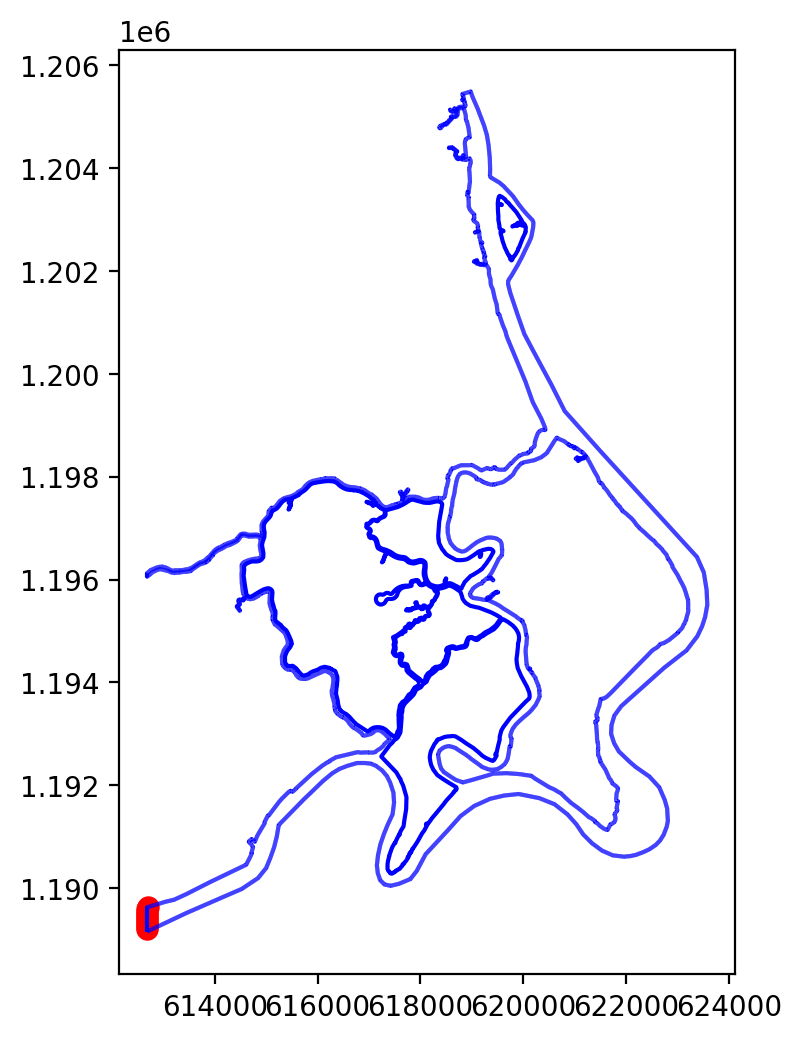

In [47]:
# Đọc file CSV vừa tạo
selected_facilities_df = pd.read_csv(file_path)

# Chuyển đổi DataFrame thành GeoDataFrame
geometry = [Point(xy) for xy in zip(selected_facilities_df['XX'], selected_facilities_df['YY'])]
geo_df = geopandas.GeoDataFrame(selected_facilities_df, geometry=geometry)

# Vẽ shapefile và các điểm facility lên bản đồ
fig, ax = plt.subplots(figsize=(8, 6))
study_area.plot(ax=ax, color='blue')  # Đổi màu shapefile thành xanh 
geo_df.plot(ax=ax, marker='o', color='red', markersize=50)

# # Thêm các chi tiết vào biểu đồ
# for x, y, label in zip(geo_df.geometry.x, geo_df.geometry.y, geo_df['id']):
#     ax.text(x, y, label, fontsize=12, ha='right')

# plt.title('Selected Facilities on Map')
# plt.xlabel('XX')
# plt.ylabel('YY')
plt.show()

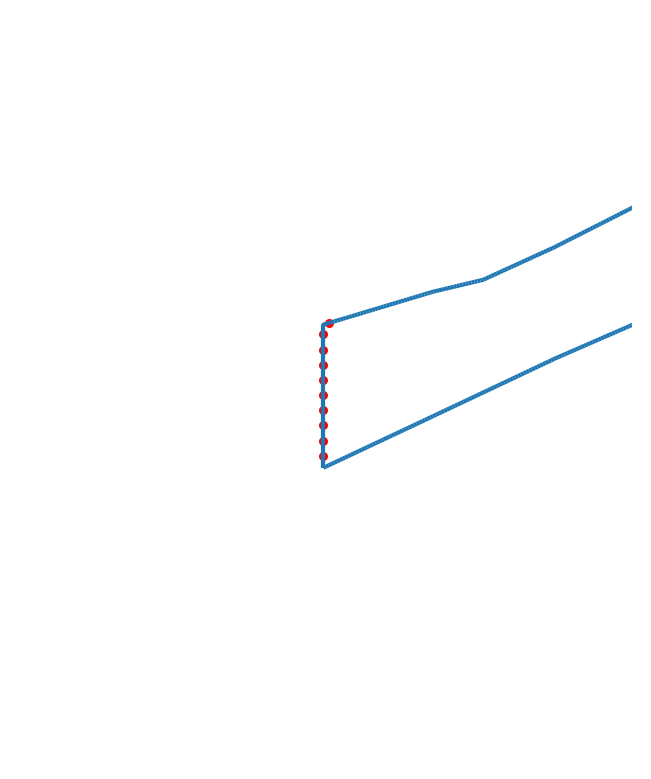

In [48]:
# Chuyển các cột XX và YY thành đối tượng Point
geometry = [Point(xy) for xy in zip(selected_facilities_df['XX'], selected_facilities_df['YY'])]

# Tạo GeoDataFrame từ DataFrame và geometry
gdf = geopandas.GeoDataFrame(selected_facilities_df, geometry=geometry, crs="EPSG:32648")

# Vẽ study_area
base = study_area.plot()

# Vẽ dữ liệu từ GeoDataFrame trên study_area
gdf.plot(ax=base, color='red', markersize=5)

# Tắt trục
base.axis("off")

# Thiết lập giới hạn trục dựa trên dữ liệu trong GeoDataFrame
buffer = 1000  # Giá trị buffer để thêm vào giới hạn trục, đơn vị là mét
x_min, y_min, x_max, y_max = gdf.total_bounds
base.set_xlim(x_min - buffer, x_max + buffer)
base.set_ylim(y_min - buffer, y_max + buffer)

# Hiển thị biểu đồ
plt.show()